In [1]:
# %load standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

# Some Stats

- Expectation: 
$$\begin{eqnarray}\mu_X & =  & E[X] \\ & = & \sum w_i \cdot x_i\end{eqnarray}$$ where $x_i$ are samples of $X$, $w_i$ is a weight, or probability, of $x_i$ showing up

- Covariance: 
$$\begin{eqnarray}\sigma_{XY}^2 & = & E[(X-E[X])\cdot(Y-E[Y])] \\ & = & E[XY] - E[X]E[Y] \\ & = & \mu_{XY} - \mu_X\mu_Y\end{eqnarray}$$

- Variance:
$$\begin{eqnarray}\sigma_X^2 & = & Var[X] \\ & = & E[(X-E[X])^2] \\ & = & E[X^2]-E[X]^2 \\ & = & \mu_{X^2}-\mu_X^2\end{eqnarray}$$

- Standard deviation: Square root of variance, i.e., $\sigma_X$.

- Correlation:
$$r_{XY}=\frac{\sigma_{XY}^2}{\sigma_X\cdot\sigma_Y}$$

In [11]:
wage = pd.read_csv('Data/Wage.csv')
wage.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [12]:
x=wage["age"]
y=wage["wage"]

In [26]:
((x*y).mean()-x.mean()*y.mean())/(np.sqrt(((x-x.mean())**2).mean())*np.sqrt(((y-y.mean())**2).mean()))

0.19563720156354275

In [25]:
# correlation coeff...
np.cov(x,y)[0,1]/(x.std()*y.std())

0.19563720156358758

In [15]:
wage.corr()

,Unnamed: 0,year,age,logwage,wage
Unnamed: 0,1.000000,0.841562,0.044978,0.051969,0.050075
year,0.841562,1.000000,0.038425,0.076239,0.065544
age,0.044978,0.038425,1.000000,0.217889,0.195637
logwage,0.051969,0.076239,0.217889,1.000000,0.950683
wage,0.050075,0.065544,0.195637,0.950683,1.000000


In [7]:
# ... as standard normal variables...
xx=(x-x.mean())/x.std()
yy=(y-y.mean())/y.std()

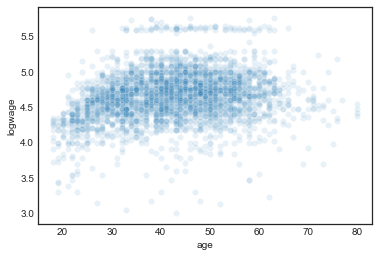

In [8]:
sns.scatterplot(data=wage, x="age", y="logwage", alpha=0.1);

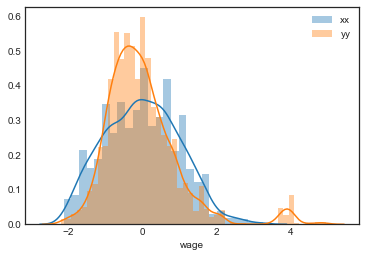

In [9]:
sns.distplot(xx, label='xx');
sns.distplot(yy, label='yy');
plt.legend();

In [10]:
# correlation coefficient is easier when standard normal forms...
# E[xx*yy]
1/(n-1)*np.dot(xx,yy)

0.19563720156358763

In [21]:
np.correlate(xx,yy)

array([586.71596749])

In [23]:
np.cov(x,y)

array([[ 133.22712726,   94.22834017],
       [  94.22834017, 1741.2756818 ]])